## Francisco Antonio Morales Hernandez Carnet: 2019 00 2196


In [643]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
dataSet = np.load('/home/francisco/Desktop/data_science_python/pyProject/proyecto_training_data.npy') 
print('El dataSet es de tipo:', type(dataSet), "cuya dimension es:", dataSet.shape, 
       'y es un tensor de rango:', dataSet.ndim)

Columnas = ["Precio real","Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales Calle"]
pandasDSetOrig = pd.DataFrame(dataSet,columns=Columnas)
pandasDSetOrig

El dataSet es de tipo: <class 'numpy.ndarray'> cuya dimension es: (1460, 6) y es un tensor de rango: 2


,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


A continuacion se realiza la division del dataset:

1. Precio de venta
2. Calidad del acabado
3. Pies cuadrados del primer piso
4. Numero total de cuartos
5. Anio de construccion
6. Pies lineales a la calle

A continuacion se presenta el toal de datos a trabajar, como siguiente punto se procede a la division del 80 porciento de la data utilizada para entrenar el modelo y el 20 porciento para la corroboracion del modelo como tal

In [644]:
trainingData = dataSet[:int(0.8*dataSet.shape[0])][:]
print(type(trainingData))
validData = dataSet[int(0.8*dataSet.shape[0]):][:]
print("Division del 80 porciento", trainingData.shape)
print("Division del 20 porciento",validData.shape)

Columnas = ["Precio real","Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales Calle"]
pandasDSet = pd.DataFrame(trainingData,columns=Columnas)
pandasDSetFinal = pd.DataFrame(validData,columns=Columnas)


<class 'numpy.ndarray'>
Division del 80 porciento (1168, 6)
Division del 20 porciento (292, 6)


In [645]:
pandasDSet

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


In [646]:
pandasDSetFinal

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
5,200500.0,5.0,1636.0,12.0,1946.0,138.0
6,239000.0,6.0,1170.0,9.0,1932.0,80.0
7,285000.0,8.0,2129.0,9.0,1992.0,85.0
8,119500.0,5.0,923.0,5.0,1984.0,37.0
9,115000.0,6.0,818.0,5.0,1926.0,NaN


# ANALISIS EXPLORATORIO DE DATOS

In [647]:
#Se separa la variable Y del resto:
Yreal = trainingData[:,0]
totalX = trainingData[:,1:8]
print(totalX.ndim,totalX.shape)


#ANALISIS EXPLORATORIO DE DATOS
mediaVect = np.nanmean(totalX,axis=0)
valMax = np.nanmax(totalX,axis=0)
valMin = np.nanmin(totalX,axis=0)
StandDev = np.nanstd(totalX, axis=0)
exploAnalisis = {"Media":mediaVect, "Val. Max.":valMax, "Val. Min.":valMin, "Desv. Estandard":StandDev}
dfExplo = pd.DataFrame(exploAnalisis, index = ["Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales de Calle"])

dfExplo

2 (1168, 5)


,Media,Val. Max.,Val. Min.,Desv. Estandard
Calidad Acabados,6.101027,10.0,1.0,1.377435
Pies Cuadrados,1156.323630,3228.0,334.0,373.620332
Total de Cuartos,6.485445,14.0,2.0,1.608452
Anio de Construccion,1971.451199,2010.0,1875.0,29.938882
Pies lineales de Calle,69.946985,313.0,21.0,23.465955


Los rangos de los valores presentados tienen la siguiente correspondencia para cada variable:

In [648]:
exploDSet =pandasDSet.describe()
exploDSet.drop(['25%','50%','75%','count'])

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [649]:
peakMin = np.array(exploDSet.iloc[3])
peakMax = np.array(exploDSet.iloc[-1])
peakTopeakList = []
for i in range(len(peakMin)):
    peakTopeakList.append(str(peakMin[i])+' , '+str(peakMax[i]))

peakDF = pd.DataFrame({'Rango':peakTopeakList[1:]},index = ["Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales de Calle"])
peakDF

,Rango
Calidad Acabados,"1.0 , 10.0"
Pies Cuadrados,"334.0 , 3228.0"
Total de Cuartos,"2.0 , 14.0"
Anio de Construccion,"1875.0 , 2010.0"
Pies lineales de Calle,"21.0 , 313.0"


A continuacion se presenta un histograma de cada variable:

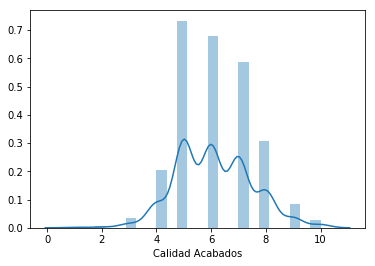

In [650]:
ax = sns.distplot(pandasDSet["Calidad Acabados"])

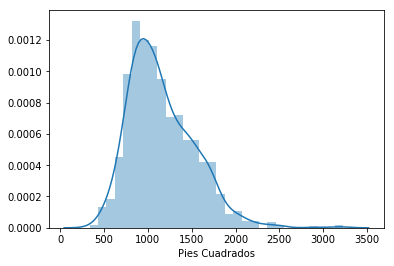

In [651]:
ax = sns.distplot(pandasDSet["Pies Cuadrados"])

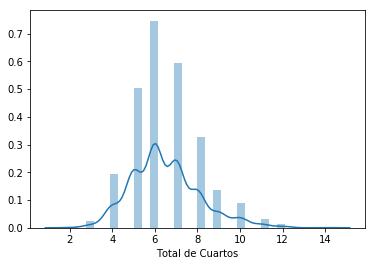

In [652]:
ax = sns.distplot(pandasDSet["Total de Cuartos"])

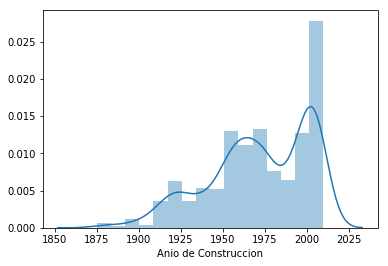

In [653]:
ax = sns.distplot(pandasDSet["Anio de Construccion"])

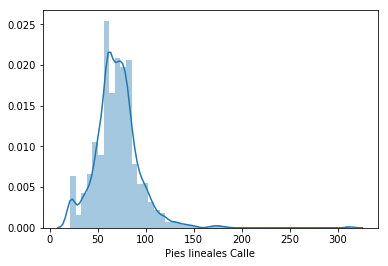

In [654]:
ax = sns.distplot(pandasDSet["Pies lineales Calle"].dropna())

A continuacion se realiza el calculo del coeficiente de correlacion para cada variable:

In [655]:
pandasDSet.corr()

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
Precio real,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Calidad Acabados,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Pies Cuadrados,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Total de Cuartos,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Anio de Construccion,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Pies lineales Calle,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


Tomando en cuenta unicamente los coeficientes de correlacion, las mejores variables son la Calidad en los Acabados y los Pies Cuadrados.

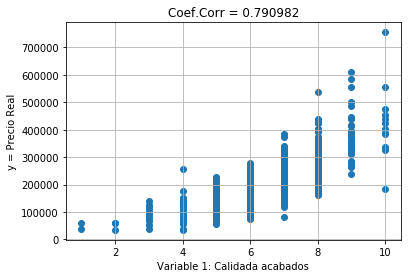

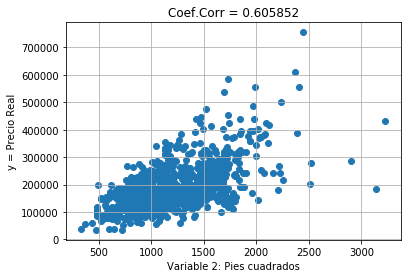

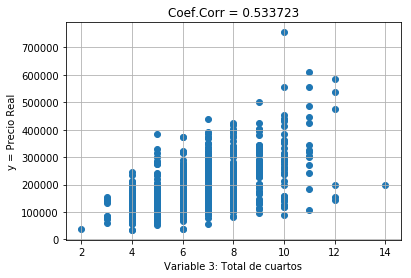

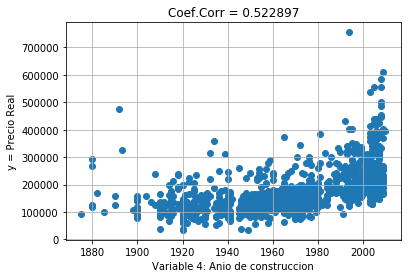

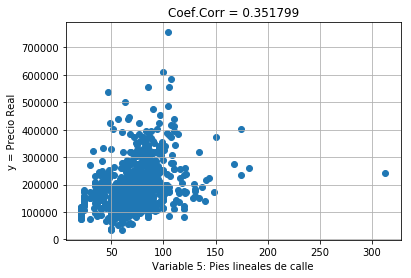

In [656]:
y  =  pandasDSet["Precio real"]
x1 =  pandasDSet["Calidad Acabados"]
x2 = pandasDSet["Pies Cuadrados"]
x3 = pandasDSet["Total de Cuartos"]
x4 = pandasDSet["Anio de Construccion"]
x5 = pandasDSet["Pies lineales Calle"]


fig = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()

ax1 = fig.add_subplot(1,1,1) 
ax2 = fig2.add_subplot(1,1,1)
ax3 = fig3.add_subplot(1,1,1)
ax4 = fig4.add_subplot(1,1,1)
ax5 = fig5.add_subplot(1,1,1)


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()


ax1.scatter(x1,y,label = "Coef.Corr = 0.790982") #
ax2.scatter(x2,y,label = "Coef.Corr = 0.605852")
ax3.scatter(x3,y,label = "Coef.Corr = 0.533723")
ax4.scatter(x4,y,label = "Coef.Corr = 0.522897")
ax5.scatter(x5,y,label = "Coef.Corr = 0.351799")




#ax.legend() #si no ejecutamos la función "legend" , no se mostraran los labels usados con plot
ax1.set_xlabel('Variable 1: Calidada acabados')
ax1.set_ylabel('y = Precio Real')
ax1.set_title("Coef.Corr = 0.790982")

ax2.set_xlabel('Variable 2: Pies cuadrados')
ax2.set_ylabel('y = Precio Real')
ax2.set_title("Coef.Corr = 0.605852")

ax3.set_xlabel('Variable 3: Total de cuartos')
ax3.set_ylabel('y = Precio Real')
ax3.set_title("Coef.Corr = 0.533723")

ax4.set_xlabel('Variable 4: Anio de construccion')
ax4.set_ylabel('y = Precio Real')
ax4.set_title("Coef.Corr = 0.522897")

ax5.set_xlabel('Variable 5: Pies lineales de calle')
ax5.set_ylabel('y = Precio Real')
ax5.set_title("Coef.Corr = 0.351799")

plt.show()

# PARTE ANALITICA


## Creacion de la funcion del modelo de regresion lineal utilizando iteraciones:

In [772]:
def trainingFunction(x, y, ite,showError, learnR):
    count = 0
    errorVect = np.array([np.nan])
    mb = np.array([0.8,0.7]) #VALORES INICIALES DE m y b
    onesVect = np.ones_like(x)
    X = np.append(x,onesVect,axis = 1) #CREACION DE MATRIX [X UNOS]
    mbDict = {}
    while(count<ite):
        count+=1    
        #CALCULO DE Y_HAT
        Y_hat = np.matmul(X,mb)
        Y_hat = Y_hat[:,np.newaxis]
        #print('IMPRESION DE YHAT\n', Y_hat)
        
        
        #CALCULO DEL ERROR PROMEDIO
        y_Y_hat = y - Y_hat
        #print("EL Y MENOS YHAT ES:\n",y_Y_hat)
        y_Y_hatPow = np.power(y_Y_hat,2)
        #print('EL Y MENOS YHAT CUADRADO ES\n', y_Y_hatPow)
        errorProm = 0.5*np.mean( y_Y_hatPow,axis=0)
        #print('IMPRESION DEL ERROR PROM',errorProm)
        
        
        #ALMACENANDO EL ERROR EN UN VECTOR
        errorVect = np.append(errorVect, errorProm,axis = 0)
        if (count%showError == 0):
            print('El error del presente modelo es: ', errorProm,'el numero de iteracion es:',count)
        #print('IMPRESION DEL ERROR VECT',errorVect)
        
        
        #CALCULO DEL GRADIENTE
        #print('YHAT-Y\n',X* Y_hat-y )
        gradVect = np.mean(X*(Y_hat-y),axis=0)
        #print('Promedios yhat-y*x', gradVect)
        #print('IMPRESION DEL GRADVECTOR', gradVect)
        
        
        #CALCULO DEL MODELO mb
        mb -= gradVect*learnR
        #print(mb)
        mbDict[count] = np.copy(mb)
        #print('IMPRESION DEL MB NUEVO', mbDict)
    return (mbDict,errorVect[1:])

In [658]:
#modelos, errVector = trainingFunction(np.array([pandasDSet['Calidad Acabados']]).transpose(), 
#                np.array([pandasDSet['Precio real']]).transpose(), 
#                ite = 1700, showError = 10, learnR = 0.000003)

#modelos2, errVector2 = trainingFunction(y = yTrainF, 
#                x=xTrainF, ite = 2, showError = 2, learnR = 0.000003)
#modelos2

## Funcion para la visualizacion de la evolucion del error

In [659]:
errVector.shape[0]
testDict = {1:[4,5]}#,2:(6,8),3:(5,3),4:(7,9)}
def visualizacionError(errVect):
    x = np.arange(errVect.shape[0])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.plot(x,errVect,label='Error en tiempo real')
    ax.legend()
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Error')
    ax.set_title('Error en tiempo real')
    plt.show   
    

## Funcion para la visualizacion de la evolucion del modelo de entrenamiento

In [717]:
def visualizacionModelos(dataStruct,n):
    x = np.linspace(-2,1000,1000)
    onesVect = np.ones_like(x)
    X = np.append([x],[onesVect],axis = 0)
    X = X.T
    count = 1
    while(count*n<=len(dataStruct)):
        y = np.matmul(X,dataStruct[n*count])
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid()
        ax.plot(x,y,label='Error del modelo')
        ax.legend()
        ax.set_xlabel('Numero de iteracion'+str(n*count))
        ax.set_ylabel('m ='+ str(dataStruct[n*count][0])+ ' b='+ str(dataStruct[n*count][1]))
        ax.set_title('Error del modelo')
        count+=1
        plt.show

In [763]:
#Pequeno codigo para trabajar los NaN de la ultima variable con pnadas
dfX5Train = pd.DataFrame({'Precio real':trainingData[:,0],'Pies lineales Calle':trainingData[:,-1]}).dropna()
dfX5Test = pd.DataFrame({'Precio real':validData[:,0],'Pies lineales Calle':validData[:,-1]}).dropna()

YtoX5Train = np.array([dfX5Train['Precio real']]).transpose()
YtoX5Test = np.array([dfX5Test['Precio real']]).transpose()

#Codigo en donde se dividen las columnas de cada varibale, Train and Test
YArrayTrain = np.array([pandasDSet['Precio real']]).transpose()
YArrayTest = np.array([pandasDSetFinal['Precio real']]).transpose()



X1ArrayTrain = np.array([pandasDSet['Calidad Acabados']]).transpose()
X1ArrayTest = np.array([pandasDSetFinal['Calidad Acabados']]).transpose()

X2ArrayTrain = np.array([pandasDSet['Pies Cuadrados']]).transpose()
X2ArrayTest = np.array([pandasDSetFinal['Pies Cuadrados']]).transpose()

X3ArrayTrain = np.array([pandasDSet['Total de Cuartos']]).transpose()
X3ArrayTest = np.array([pandasDSetFinal['Total de Cuartos']]).transpose()

X4ArrayTrain = np.array([pandasDSet['Anio de Construccion']]).transpose()
X4ArrayTest = np.array([pandasDSetFinal['Anio de Construccion']]).transpose()

X5ArrayTrain = np.array([dfX5Train['Pies lineales Calle']]).transpose()
X5ArrayTest = np.array([dfX5Test['Pies lineales Calle']]).transpose()

## Entrenamiento y graficas del modelo de regresion lineal para cada valor de la variable independiente.

### Variable Calidad de acabados:

El error del presente modelo es:  [8.29247359e+09] el numero de iteracion es: 400
El error del presente modelo es:  [4.02928004e+09] el numero de iteracion es: 800
El error del presente modelo es:  [2.40054104e+09] el numero de iteracion es: 1200
El error del presente modelo es:  [1.7781797e+09] el numero de iteracion es: 1600
El error del presente modelo es:  [1.54026088e+09] el numero de iteracion es: 2000
El error del presente modelo es:  [1.44920161e+09] el numero de iteracion es: 2400


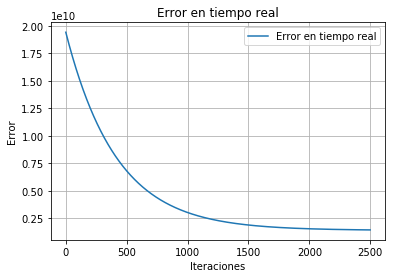

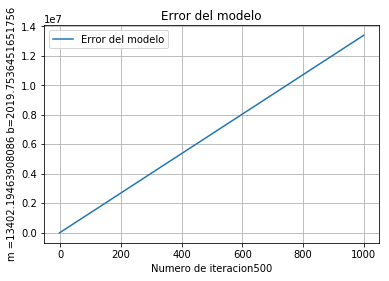

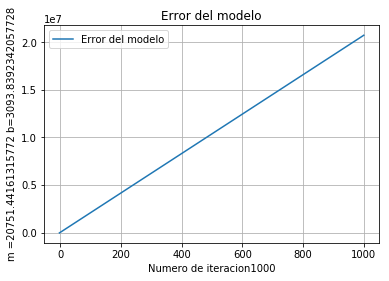

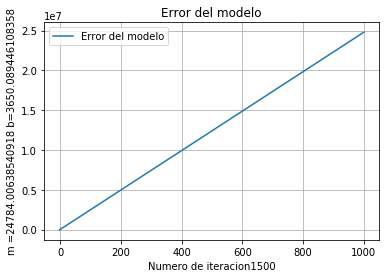

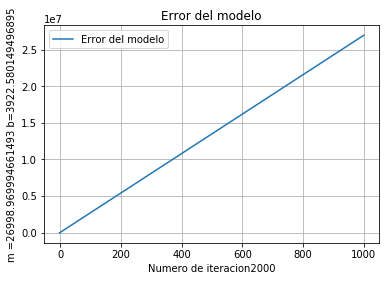

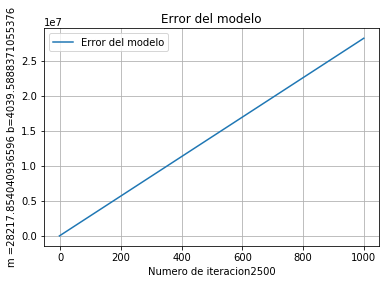

In [837]:
manualMB1 = trainingFunction(x = X1ArrayTrain, y = YArrayTrain, ite = 2500,showError=400, learnR=0.00003)
visualizacionError(manualMB1[1])
visualizacionModelos(dataStruct=manualMB1[0],n= 500)

### Variable Pies Cuadrados:

El error del presente modelo es:  [9.08503152e+09] el numero de iteracion es: 10000
El error del presente modelo es:  [4.902341e+09] el numero de iteracion es: 20000
El error del presente modelo es:  [3.17785567e+09] el numero de iteracion es: 30000
El error del presente modelo es:  [2.46686603e+09] el numero de iteracion es: 40000
El error del presente modelo es:  [2.17373146e+09] el numero de iteracion es: 50000
El error del presente modelo es:  [2.05287473e+09] el numero de iteracion es: 60000
El error del presente modelo es:  [2.0030466e+09] el numero de iteracion es: 70000
El error del presente modelo es:  [1.98250291e+09] el numero de iteracion es: 80000


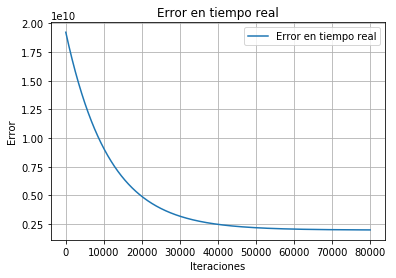

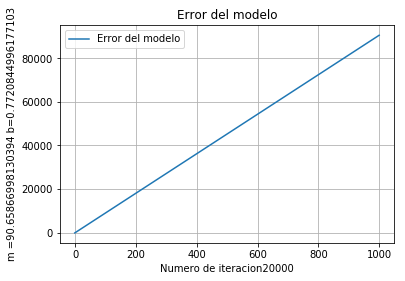

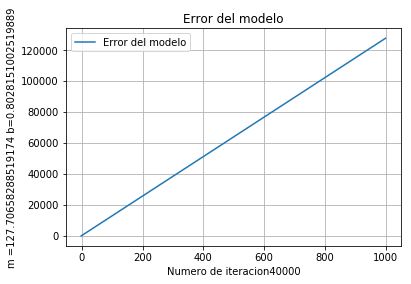

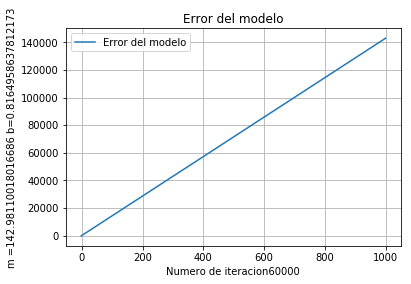

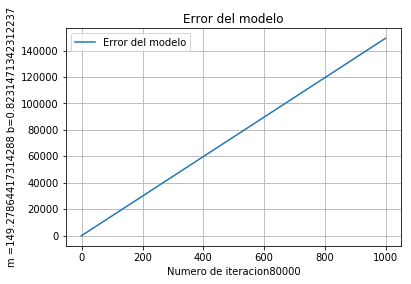

In [815]:
manualMB2 = trainingFunction(x = X2ArrayTrain, y = YArrayTrain, ite = 80000,showError=10000, learnR=0.00000000003)
visualizacionError(manualMB2[1])
visualizacionModelos(dataStruct=manualMB2[0],n= 20000)

### Variable Total de Cuartos

El error del presente modelo es:  [7.91585595e+09] el numero de iteracion es: 400
El error del presente modelo es:  [4.05499336e+09] el numero de iteracion es: 800
El error del presente modelo es:  [2.76330662e+09] el numero de iteracion es: 1200
El error del presente modelo es:  [2.33116092e+09] el numero de iteracion es: 1600
El error del presente modelo es:  [2.18658247e+09] el numero de iteracion es: 2000
El error del presente modelo es:  [2.13821224e+09] el numero de iteracion es: 2400
El error del presente modelo es:  [2.12202934e+09] el numero de iteracion es: 2800


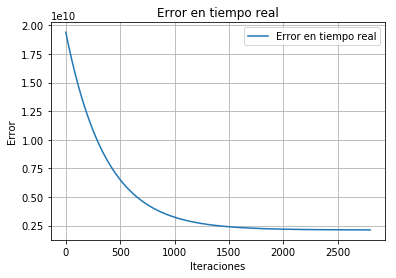

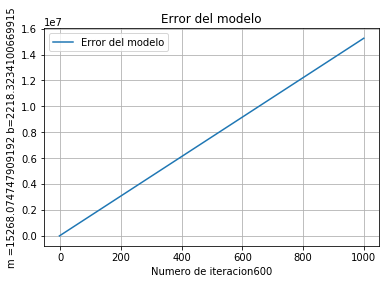

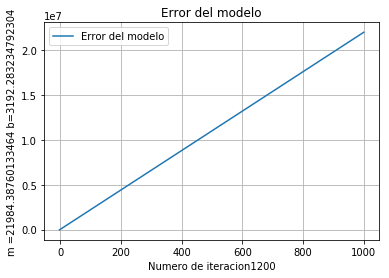

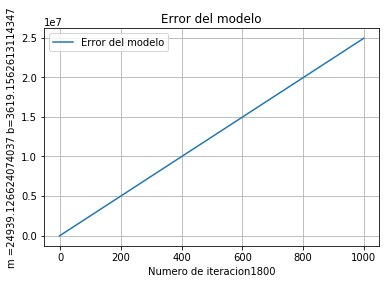

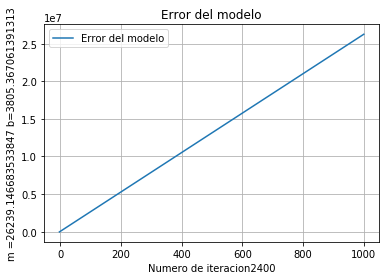

In [817]:
manualMB3 = trainingFunction(x = X3ArrayTrain, y = YArrayTrain, ite = 2800,showError=400, learnR=0.00003)
visualizacionError(manualMB3[1])
visualizacionModelos(dataStruct=manualMB3[0],n= 600)

### Variable Anio de construccion

El error del presente modelo es:  [9.33905938e+09] el numero de iteracion es: 4000
El error del presente modelo es:  [5.48828582e+09] el numero de iteracion es: 8000
El error del presente modelo es:  [3.97358866e+09] el numero de iteracion es: 12000
El error del presente modelo es:  [3.37778435e+09] el numero de iteracion es: 16000
El error del presente modelo es:  [3.14342544e+09] el numero de iteracion es: 20000
El error del presente modelo es:  [3.05124065e+09] el numero de iteracion es: 24000
El error del presente modelo es:  [3.01497987e+09] el numero de iteracion es: 28000
El error del presente modelo es:  [3.00071673e+09] el numero de iteracion es: 32000


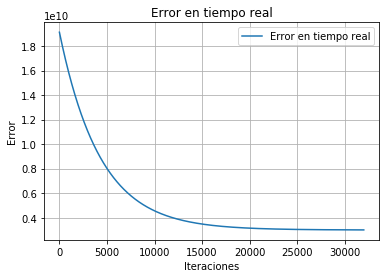

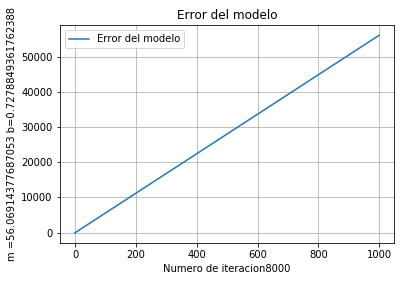

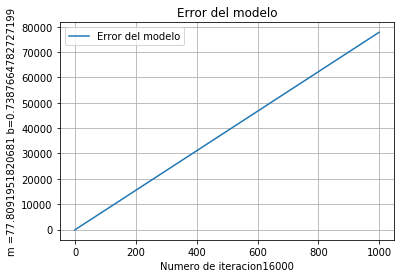

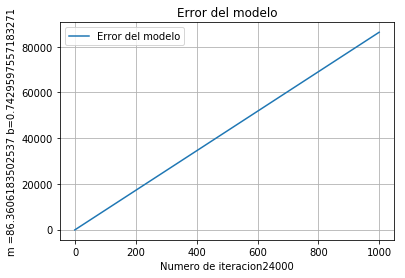

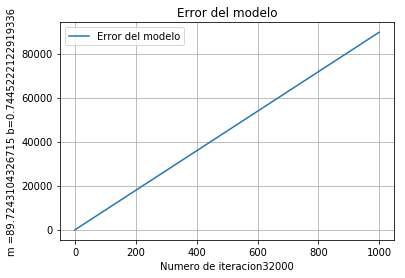

In [822]:
manualMB4 = trainingFunction(x = X4ArrayTrain, y = YArrayTrain, ite = 32000,showError=4000,learnR=0.00000000003)
visualizacionError(manualMB4[1])
visualizacionModelos(dataStruct=manualMB4[0],n= 8000)

### Variable pies lineales de calle

El error del presente modelo es:  [1.98370785e+10] el numero de iteracion es: 1
El error del presente modelo es:  [1.00075354e+10] el numero de iteracion es: 2
El error del presente modelo es:  [6.0659533e+09] el numero de iteracion es: 3
El error del presente modelo es:  [4.48539571e+09] el numero de iteracion es: 4
El error del presente modelo es:  [3.8515898e+09] el numero de iteracion es: 5
El error del presente modelo es:  [3.59742363e+09] el numero de iteracion es: 6
El error del presente modelo es:  [3.49548992e+09] el numero de iteracion es: 7
El error del presente modelo es:  [3.45460018e+09] el numero de iteracion es: 8


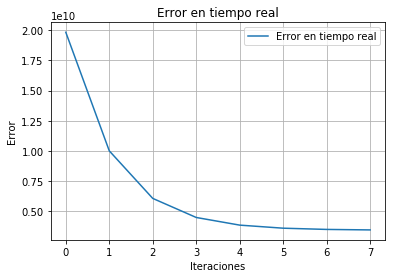

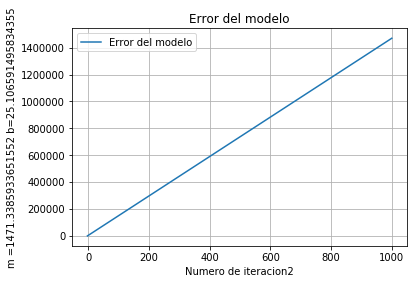

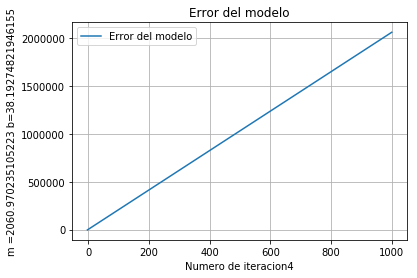

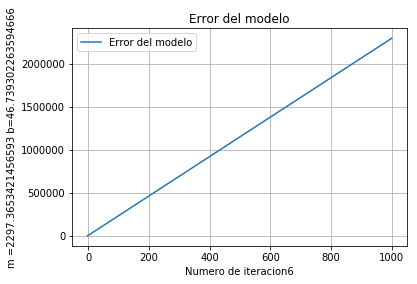

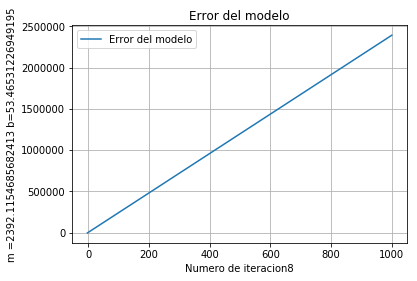

In [828]:
manualMB5 = trainingFunction(x = X5ArrayTrain, y = YtoX5Train, ite = 8,showError=1, learnR=0.0003)
visualizacionError(manualMB5[1])
visualizacionModelos(dataStruct=manualMB5[0],n= 2)

# Entrenamiento de un modelo de regresion lineal utilizando scikit-learn para cada una de las variables

In [762]:

regrX1 = linear_model.LinearRegression()
regrX2 = linear_model.LinearRegression()
regrX3 = linear_model.LinearRegression()
regrX4 = linear_model.LinearRegression()
regrX5 = linear_model.LinearRegression()

#Entrenar el modelo
regrX1.fit(X1ArrayTrain, YArrayTrain)
regrX2.fit(X2ArrayTrain, YArrayTrain)
regrX3.fit(X3ArrayTrain, YArrayTrain)
regrX4.fit(X4ArrayTrain, YArrayTrain)
regrX5.fit(X5ArrayTrain, np.array([dfX5Train['Precio real']]).transpose())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Funcion de Prediccion de datos:

In [880]:
def prediction(manualModel, scikitModel, x):
    #Prediccion modelo manual
    onesVect = np.ones_like(x)
    X = np.append(x,onesVect,axis = 1) #CREACION DE MATRIX [X UNOS]
    Ymanual = np.matmul(X,manualModel)
    Ymanual = Ymanual[:,np.newaxis]
    
    #Prediccion modelo SciKitLearn
    Yscikit = scikitModel.predict(x)
    
    #PrediccionPromedioModelos
    YnewModel = np.append(Ymanual,Yscikit,axis=1)
    YnewModel = np.mean(YnewModel, axis =1)
    
    return (Ymanual, Yscikit, YnewModel)

In [870]:
vectPredictionX1 = prediction(manualMB1[0][2500],regrX1,X1ArrayTrain)

In [875]:
vectPredictionX2 = prediction(manualMB2[0][80000],regrX2,X2ArrayTrain)

In [876]:
vectPredictionX3 = prediction(manualMB3[0][2800],regrX3,X3ArrayTrain)

In [877]:
vectPredictionX4 = prediction(manualMB4[0][32000],regrX4,X4ArrayTrain)

In [878]:
vectPredictionX5 = prediction(manualMB5[0][8],regrX5,X5ArrayTrain)

# Aplicacion de los modelos predictivos